# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = '/home/carnd/train.p'
testing_file = '/home/carnd/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


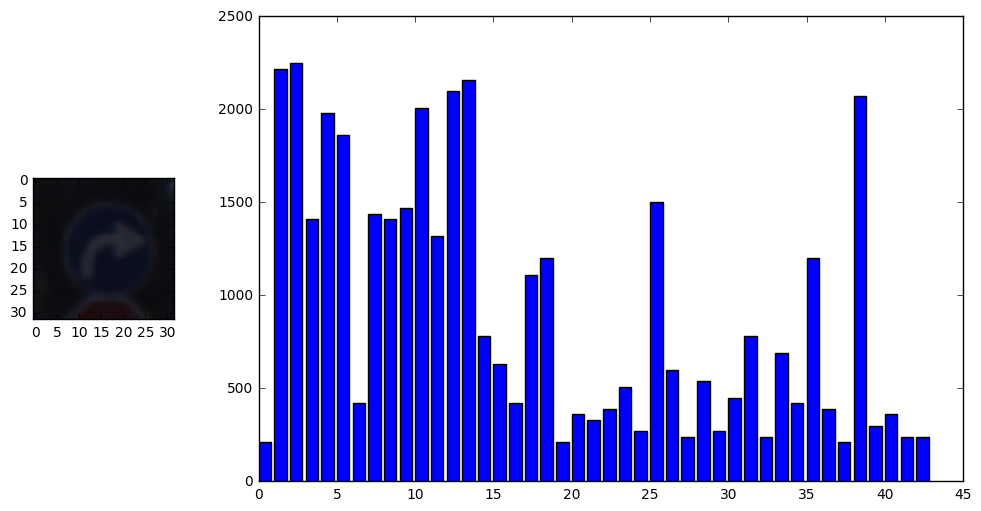

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
%matplotlib inline
import numpy as np
import scipy.misc as smp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter
from matplotlib import gridspec

fig = plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 
a=fig.add_subplot(gs[0])

image_arr = np.asarray(X_train[33430], dtype=np.uint8)
img = smp.toimage(image_arr)       
imgplot = plt.imshow(img)

class_dict = dict(Counter(y_train))

a=fig.add_subplot(gs[1])

plt.bar(range(len(class_dict)), class_dict.values(), align='edge')
# plt.xticks(range(len(class_dict)), list(class_dict.keys()))

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


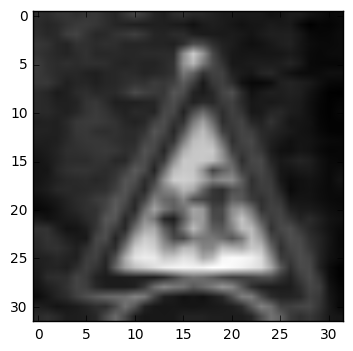

(39209, 32, 32)
(39209, 32, 32, 1)
(12630, 32, 32, 1)


In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.preprocessing import LabelBinarizer

def convert_to_grayscale(img):
    return np.mean(img, axis=3)

def normalize(img):
    
    # Data around origin
    img -= np.mean(img)
    
    # Normalization
    img /= np.std(img, axis = 0)
    
    return img

def one_hot_encode(labels):
    enc = LabelBinarizer()
    return enc.fit_transform(labels).astype(np.float32) 
    

# Processing features
X_train_processed = normalize(convert_to_grayscale(X_train))
X_test_processed = normalize(convert_to_grayscale(X_test))

# Processing label
y_train_processed = one_hot_encode(y_train)
y_test_processed = one_hot_encode(y_test)
# print(y_train)

print(one_hot_encode(y_train))
plt.imshow(X_train_processed[31030], cmap='gray')
plt.show()

print(X_train_processed.shape)


def reshape_image(data, image_shape, num_channels=1):
    # reshape the image for convolution
    return data.reshape(-1, image_shape[0], image_shape[1], 1).astype(np.float32)

X_train_reshape = reshape_image(X_train_processed, image_shape, 1)
X_test_reshape = reshape_image(X_test_processed, image_shape, 1)

print(X_train_reshape.shape)
print(X_test_reshape.shape)

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

- First I converted the images to grayscale by simply taking mean of the data. It will make our computations faster as we don't need to apply calculations on all the 3 channels.
- Then I normalized the image pixels by subtracting the mean so that they are around origin and then dividing by standard deviation so that they are on same scale.
- I encoded labes using one hot encoding so that it is easy and possible to classify a multiscale classifier.

In [5]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train_reshape, y_train_processed, test_size=0.33, stratify=y_train_processed)
print(X_train.shape)
print(X_validate.shape)
print(y_train.shape)

(26270, 32, 32, 1)
(12939, 32, 32, 1)
(26270, 43)


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
- I used to sklean.model_selection's train_test_split function to generate training and validation set. I used 1/3rd of data as validation and rest as training
- We already have the test data with us so I didn't need an extra test set
- I didn't generate additional data as of now. But I could generate it using rotation or shifting the image.

In [6]:
n_channels = 1

# Conv Layer 1
layer_1_filter_size = 6
layer_1_num_filter = 6

# Conv Layer 2
layer_2_filter_size = 4
layer_2_num_filter = 16

keep_prob = 0.5

# Size of the fully connected layer
fully_conn_size = 128

def get_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=1e-3))

def get_biases(num_filter):
    return tf.Variable(tf.constant(0.02, shape=[num_filter]))

def get_conv_layer(inputs, weights, biases, max_pool=True):
    strides = [1, 1, 1, 1]
    padding = 'SAME'
    x = tf.nn.conv2d(inputs, weights, strides, padding) + biases
    
    if(max_pool):
        ksize = [1, 2 ,2 ,1]
        strides = [1, 2, 2, 1]
        padding = 'SAME'
        x = tf.nn.max_pool(x, ksize, strides, padding)
        
    return tf.nn.relu(x)

In [7]:
def get_flattened_layer(layer):
    """
        Flatterns the layer
    """
    layer_shape = layer.get_shape()
    
    num_features = layer_shape[1:4].num_elements()
    
    layer_flat = tf.reshape(layer, [-1, num_features])
    
    return layer_flat, num_features

In [8]:
def get_fully_connected_layer(input_layer, weights, biases, use_RELU=True, train=False):
    print(input_layer)
    print(weights)
    output = tf.matmul(input_layer, weights) + biases
    
    if(train):
        output = tf.nn.dropout(output, keep_prob=keep_prob)
        
    if(use_RELU):
        output = tf.nn.relu(output)
    
    return output

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten



layer_1_weights = get_weights([layer_1_filter_size, layer_1_filter_size, n_channels, layer_1_num_filter])
layer_1_biases = get_biases(layer_1_num_filter)

layer_2_weights = get_weights([layer_2_filter_size, layer_2_filter_size, layer_1_num_filter, layer_2_num_filter])
layer_2_biases = get_biases(layer_2_num_filter)

flattened_layer_size = int(image_shape[0]//4) * int(image_shape[0]//4) * layer_2_num_filter
weights_fully_conn_layer_1 = get_weights([flattened_layer_size, fully_conn_size])
biases_fully_conn_layer_1 = get_biases(fully_conn_size)

weights_fully_conn_layer_2 = get_weights([fully_conn_size, n_classes])
biases_fully_conn_layer_2 = get_biases(n_classes)


# LeNet architecture:
# INPUT -> CONV -> ACT -> POOL -> CONV -> ACT -> POOL -> FLATTEN -> FC -> ACT -> FC
#
# Don't worry about anything else in the file too much, all you have to do is
# create the LeNet and return the result of the last fully connected layer.
def LeNet(x):
    # convolutional and pooling layers.

    # TODO: Define the LeNet architecture.

    # Convolutional Layer
    layer_1_conv_layer = get_conv_layer(x, layer_1_weights, layer_1_biases, max_pool=True)
    
    # Convolutional layer
    layer_2_conv_layer = get_conv_layer(layer_1_conv_layer, layer_2_weights, layer_2_biases, max_pool=True)
    
    # Flatten
    layer_flat,num_features = get_flattened_layer(layer_2_conv_layer)

    # Fully connected
    fully_connected_layer_1_output = get_fully_connected_layer(layer_flat, weights_fully_conn_layer_1, biases_fully_conn_layer_1, train=train)
    
    # Fully Connected
    fully_connected_layer_2_output = get_fully_connected_layer(fully_connected_layer_1_output, weights_fully_conn_layer_2, biases_fully_conn_layer_2, use_RELU=False)


    # Return the result of the last fully connected layer.
    return fully_connected_layer_2_output

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
- I used the same Architecture provided to us in the lenet file. So I used Lenet Architecture. Sizes of the layer can be seen in the code.

Layered Architecture -- INPUT -> CONV -> ACT -> POOL -> CONV -> ACT -> POOL -> FLATTEN -> FC -> ACT -> FC
- Both the convolution layer and the Fully connected layer have weights and biases. All these 4 weights are to be trained.

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.

BATCH_SIZE = 128

# Regularization paramter
beta = 1e-4

x = tf.placeholder(tf.float32, shape=[None, image_shape[0], image_shape[1], n_channels])
# Classify 43 classes.
y = tf.placeholder(tf.float32, shape=[None, n_classes])

x_valid = tf.constant(X_validate)
x_test = tf.constant(X_test)

fc2 = LeNet(x)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(fc2, y)) + beta*(tf.nn.l2_loss(layer_1_weights) + tf.nn.l2_loss(layer_2_weights) + tf.nn.l2_loss(weights_fully_conn_layer_1) + tf.nn.l2_loss(weights_fully_conn_layer_2))
opt = tf.train.AdamOptimizer(1e-3)
train_op = opt.minimize(loss_op)


y_pred = tf.nn.softmax(fc2)

valid_pred = tf.nn.softmax(LeNet(x_valid))
test_pred = tf.nn.softmax(LeNet(X_test_reshape))

Tensor("Reshape:0", shape=(?, 1024), dtype=float32)
Tensor("Variable_4/read:0", shape=(1024, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 128), dtype=float32)
Tensor("Variable_6/read:0", shape=(128, 43), dtype=float32)
Tensor("Reshape_4:0", shape=(12939, 1024), dtype=float32)
Tensor("Variable_4/read:0", shape=(1024, 128), dtype=float32)
Tensor("Relu_5:0", shape=(12939, 128), dtype=float32)
Tensor("Variable_6/read:0", shape=(128, 43), dtype=float32)
Tensor("Reshape_5:0", shape=(12630, 1024), dtype=float32)
Tensor("Variable_4/read:0", shape=(1024, 128), dtype=float32)
Tensor("Relu_8:0", shape=(12630, 128), dtype=float32)
Tensor("Variable_6/read:0", shape=(128, 43), dtype=float32)


In [11]:
def data_iterator(x, y):
    """ A simple data iterator """
    while True:
        # shuffle labels and features
        idxs = np.arange(0, len(x))
        np.random.shuffle(idxs)
        shuf_features = x[idxs]
        shuf_labels = y[idxs]
        batch_size = BATCH_SIZE
        for batch_idx in range(0, len(x), batch_size):
            images_batch = shuf_features[batch_idx:batch_idx+batch_size]
            labels_batch = shuf_labels[batch_idx:batch_idx+batch_size]
            yield images_batch, labels_batch


In [12]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [13]:
import math

EPOCH = 100
session = tf.Session()
session.run(tf.global_variables_initializer())

num_iterations_per_epoch = math.ceil(X_train.shape[0]/BATCH_SIZE)

iter_ = data_iterator(X_train, y_train)

for i in range(EPOCH):

    for j in range(num_iterations_per_epoch):
        # get a batch of data
        x_batch, y_batch = next(iter_)

        # Run the optimizer on the batch
        session.run([train_op], feed_dict={x: x_batch, y: y_batch})

    train_cost, train_predictions = session.run([loss_op, y_pred], feed_dict={x: X_train, y: y_train})
    print("train accuracy %.1f%% with loss %0.1f in epoch %d" % (float(accuracy(train_predictions, y_train)), train_cost, (i+1)))
    
print('Validation accuracy: %.1f%%' % accuracy(valid_pred.eval(session=session), y_validate))        
print('Test accuracy: %.1f%%' % accuracy(test_pred.eval(session=session), y_test_processed))

train accuracy 8.0% with loss 3.4 in epoch 1
train accuracy 22.4% with loss 2.8 in epoch 2
train accuracy 54.3% with loss 1.5 in epoch 3
train accuracy 66.1% with loss 1.1 in epoch 4
train accuracy 74.3% with loss 0.9 in epoch 5
train accuracy 78.5% with loss 0.7 in epoch 6
train accuracy 81.8% with loss 0.6 in epoch 7
train accuracy 84.1% with loss 0.5 in epoch 8
train accuracy 86.7% with loss 0.5 in epoch 9
train accuracy 87.5% with loss 0.4 in epoch 10
train accuracy 88.5% with loss 0.4 in epoch 11
train accuracy 89.5% with loss 0.4 in epoch 12
train accuracy 90.6% with loss 0.3 in epoch 13
train accuracy 91.4% with loss 0.3 in epoch 14
train accuracy 92.0% with loss 0.3 in epoch 15
train accuracy 92.4% with loss 0.3 in epoch 16
train accuracy 93.5% with loss 0.2 in epoch 17
train accuracy 93.9% with loss 0.2 in epoch 18
train accuracy 93.9% with loss 0.2 in epoch 19
train accuracy 93.6% with loss 0.2 in epoch 20
train accuracy 95.0% with loss 0.2 in epoch 21
train accuracy 95.4% wi

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

- I used Adam Optimizer which is Gradient descent optimizier. The initial learning rate was 0.001.
- I used Batch size as 128
- I used 100 epochs and I got a decent validation and test accuracy.
- I also used a regularization to penalize weights and prevent overfitting. The value is 1e-4
- I used dropout rate of 0.5

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**
Since I am new to Deep learning, I used the already known Lenet Architecture which I did in the Lenet lab. I tried couple of filter sizes but the ones in which I got a decent test accurcay were

       Conv Layer 1
        layer_1_filter_size = 6
        layer_1_num_filter = 6

       Conv Layer 2
        layer_2_filter_size = 4
        layer_2_num_filter = 16
        
I initialized weights and biases and got some decent results with the ones which can be seen above.

I will try again with different paramteres and hyperparameters and different optimizer once I get more theoritical knowledge.

This article http://cs231n.github.io/convolutional-networks/ helped me a lot in understanding how to build it

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import glob
import cv2

def read_image(path):
    images = []
    for img in glob.glob(path):
        read_image = cv2.imread(img)
#         read_image = read_image.astype(np.float32)
        images.append(read_image)
        
    return images
    
def resize_image(images):
    images_new = []
    for img in images:
        img_resize = cv2.resize(img, (image_shape[0], image_shape[1]))
        images_new.append(img_resize)
    
    return images_new
    
    


In [15]:
read_images = read_image("/home/carnd/SDC-udacity/traffic-signs/collected_data/*")

In [16]:
coll_images = resize_image(read_images)

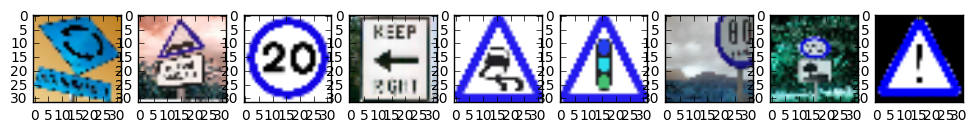

In [17]:
def plot_images(images, cmap=None):
    fig = plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
    gs = gridspec.GridSpec(1, 9)
    count = 0
    for g in gs:
#         ax = plt.subplot(g)
        fig.add_subplot(g)
        if cmap == None:
            plt.imshow(images[count])
        else:
            plt.imshow(images[count], cmap=cmap)
        count = count + 1
        
# plot_images(read_images)
plot_images(coll_images)

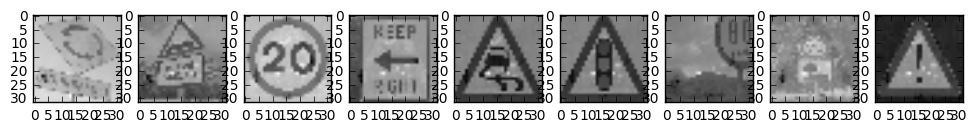

In [18]:
processed_new_images = normalize(convert_to_grayscale(coll_images))
# print(processed_new_images)
plot_images(processed_new_images, cmap='gray')

In [19]:
images_coll = reshape_image(processed_new_images, image_shape)
# print(images_coll)
x_collected = images_coll
y_collected_original = np.array([40, 22, 0, 38, 23, 26, 5, 4, 18])
def one_hot_new_new(labels):
    labels = (np.arange(n_classes) == labels[:,None]).astype(np.float)
    return labels
y_collected_original_one_hot = one_hot_new_new(y_collected_original)
# print(y_collected_original_one_hot)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**
- Some of the images are confusing as in the Keep Right image has a left arrow and classifier is not able to understand.
- The traffic sign signal is looking like a caution sign. Maybe if we increase the size of image and classify then it can be more accurate.
- Some of the images has some text and I think classifier is getting confused in predicting.

In [25]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
y_collected_pred = tf.nn.softmax(LeNet(x_collected))
y_collected_pred_eval = session.run(y_collected_pred, feed_dict={x: x_collected, y: y_collected_original_one_hot})
# print(y_collected_pred_eval)
print([np.argmax(row) for row in y_collected_pred_eval])
print(float(accuracy(y_collected_pred_eval, y_collected_original_one_hot)))

Tensor("Reshape_9:0", shape=(9, 1024), dtype=float32)
Tensor("Variable_4/read:0", shape=(1024, 128), dtype=float32)
Tensor("Relu_20:0", shape=(9, 128), dtype=float32)
Tensor("Variable_6/read:0", shape=(128, 43), dtype=float32)
[26, 26, 26, 10, 23, 26, 22, 25, 18]
33.333333333333336


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset?_


**Answer:**
Nope. Model is not able to perform since the images are little confusing. It is able to classify simple images but as mentioned earlier, some of them are little confusing.

I think training more images and training various translation (like rotation, shifting or other modifications) can be helpful. For example in the case of the image which shows 80 as speed limit but it's near one of the corner. This model is unable to classify that.

In [26]:
import csv

# http://www.pythonforbeginners.com/systems-programming/using-the-csv-module-in-python/
ifile  = open('signnames.csv', "r")
reader = csv.reader(ifile)

class_list = []

rownum = 0
for row in reader:
    # Save header row.
    if rownum == 0:
        header = row
    else:
        colnum = 0
        for col in row:
            if colnum == 1:
                class_list.append(col)
            colnum += 1
            
    rownum = rownum + 1
    
    
print(class_list[1])

def get_sign_names(indices):
    return_list = []
    for index in indices:
        return_list.append(class_list[index])
        
    return return_list

Speed limit (30km/h)


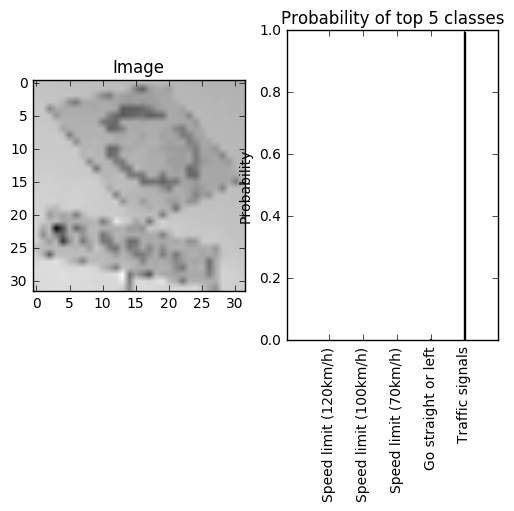

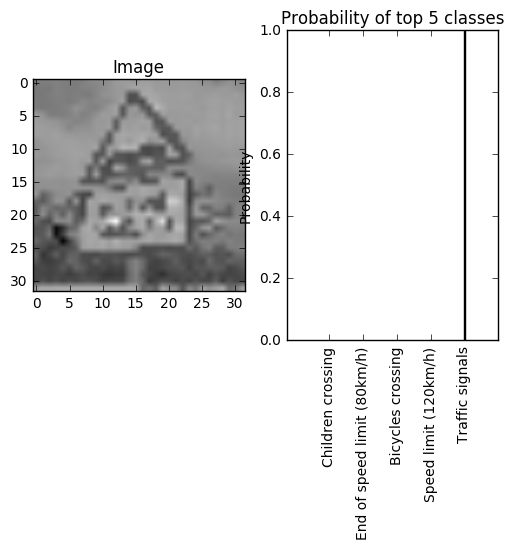

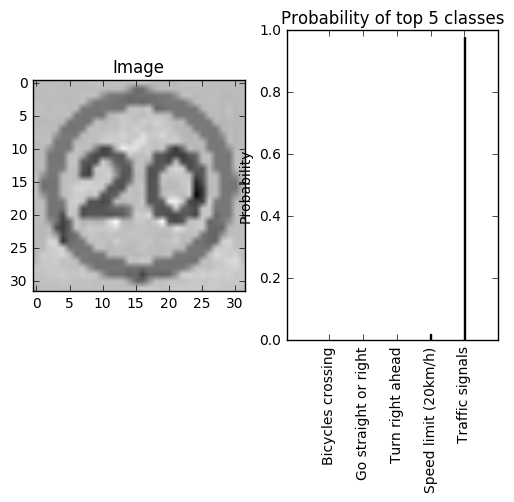

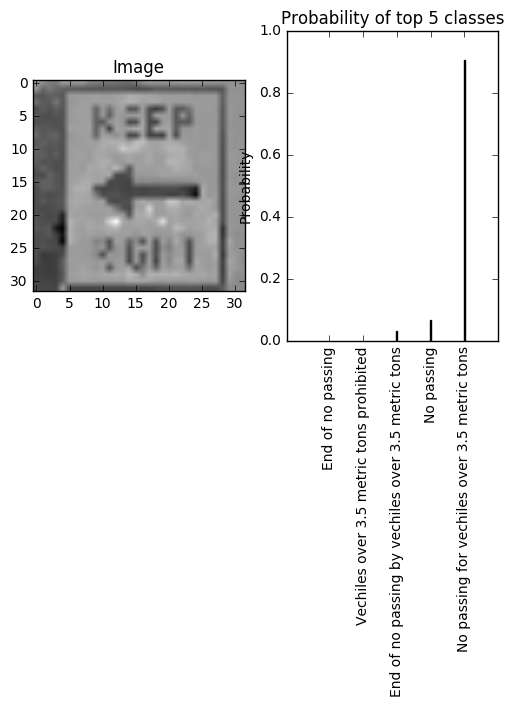

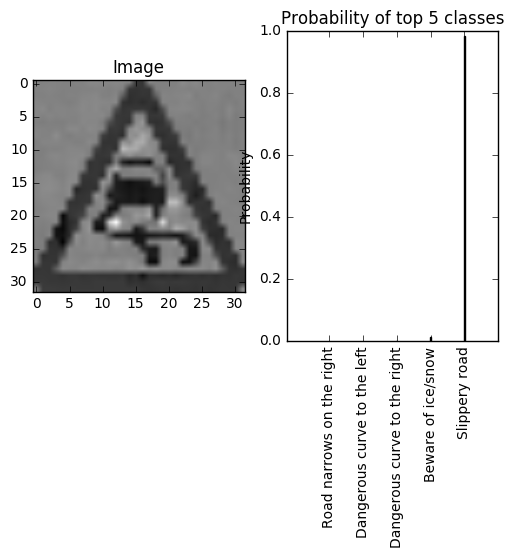

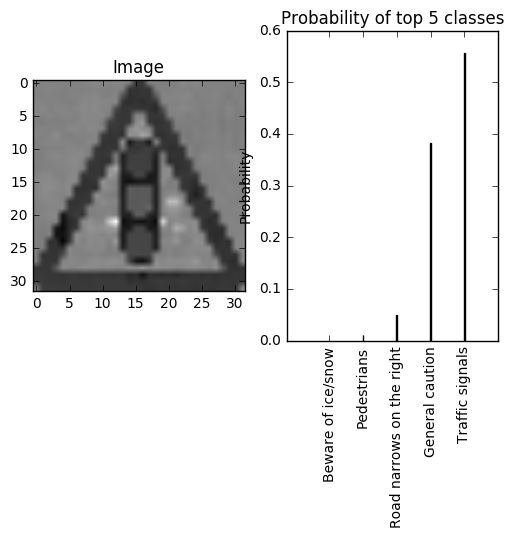

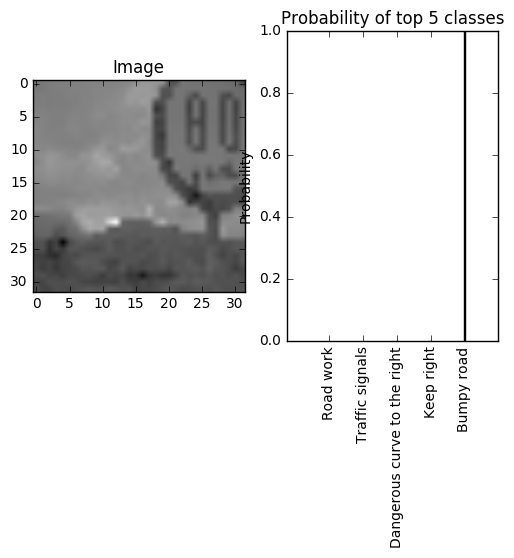

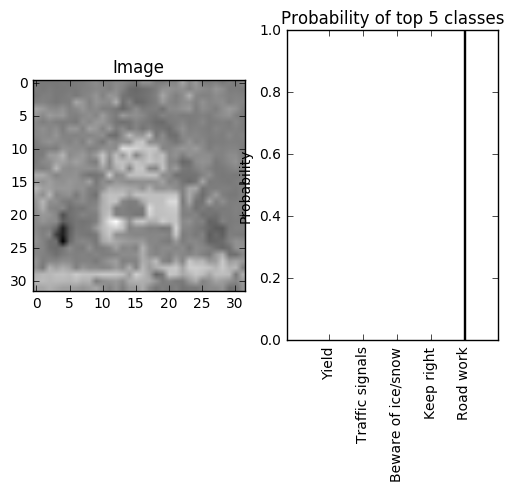

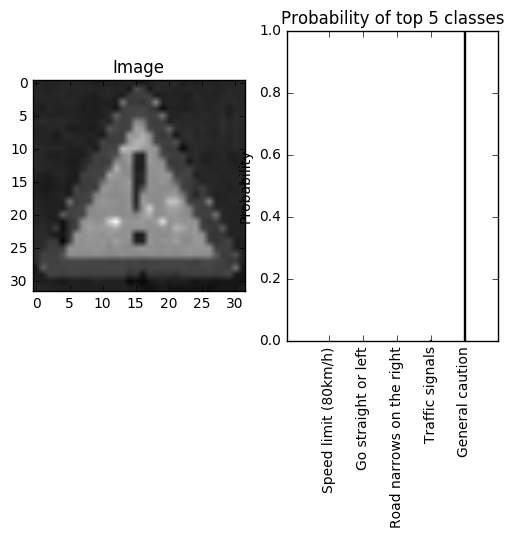

In [31]:
for i, image in enumerate(images_coll):
    
    # Get the top k probabilities and the classes to which they correspond
    top_k = tf.nn.top_k(y_collected_pred_eval[i], k=5)
    indices = top_k.indices.eval(session=session)
    values = top_k.values.eval(session=session)
    
    # Sort in ascending order
    idx = values.argsort()
    values = values[idx]
    indices = indices[idx]

    plt.subplot(121);
    plt.imshow(image.reshape(image_shape[0], image_shape[1]), cmap='gray');
    plt.title('Image');

    # Show a bar chart of the probabilities
    y_pos = range(0, 200, 40)
    
    plt.subplot(122)
    plt.bar(y_pos, values, align='center') 
    plt.xticks(y_pos, get_sign_names(indices))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

    plt.ylabel('Probability')
    plt.title('Probability of top 5 classes')
    plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**
- model gets almost half of prediction correct.
- except from 2 out of 9 images, I can see the correct predictions in top 5.
- This is not a very good model. I will try to tweak some hyperparameters to make it better

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

    read_images = read_image("/home/carnd/SDC-udacity/traffic-signs/collected_data/*")
    coll_images = resize_image(read_images)
    processed_new_images = normalize(convert_to_grayscale(coll_images))
    images_coll = reshape_image(processed_new_images, image_shape)
    x_collected = images_coll
    y_collected_original = np.array([40, 22, 0, 38, 23, 26, 5, 4, 18])

    y_collected_original_one_hot = one_hot_new_new(y_collected_original)
    y_collected_pred = tf.nn.softmax(LeNet(x_collected))
    y_collected_pred_eval = session.run(y_collected_pred, feed_dict={x: x_collected, y: y_collected_original_one_hot})
    print([np.argmax(row) for row in y_collected_pred_eval])
    print(float(accuracy(y_collected_pred_eval, y_collected_original_one_hot)))

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.